## Introductory Machine Learning: Assignment 3

**Deadline:**

Assignment 3 is due Tuesday, November 1 at 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on [Canvas](https://canvas.yale.edu).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on [Canvas](https://canvas.yale.edu).  You can also post questions or start discussions on [Ed Discussion](https://edstem.org/us/courses/9209/discussion/). The problems are broken up into steps that should help you to make steady progress.

**Submission:**

Submit your assignment as a .pdf on Gradescope, and as a .ipynb on Canvas. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:  
1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as", select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf

**Topics**
1. Random forests
2. Principal components analysis                                                               
3. Dimension reduction

## Problem 1: Seeing the random forests for the trees (25 points)

This problem is based on the `diabetes` dataset from the `sklearn` package. Please read about the dataset at [https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset). We will predict the response, which is a quantitative measure of diabetes progression one year after baseline, using regression trees and random forests.

The following cell imports the dataset as `diabetes` and names the predictor variables `diabetes_x` and the response `diabetes_y`. Just run this cell, do not modify it.

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_x = diabetes.data
diabetes_y = diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### 1.1 Building a simple regression tree

To start, you will *manually* build a regression tree using only two of the predictor variables: `bmi` and `s5`. To keep things simple, build a tree that has exactly three nodes and four leaves. So, the data is split into two parts initially and then each of those parts is again split one more time. At each node you will need to evaluate each possible splitting point for both `bmi` and `s5` and pick the one that minimizes the RSS.

When you have built the regression tree, create a scatter plot of `s5` versus `bmi`, color-coded by the response variable. In this plot, use vertical and horizontal lines to indicate the regions that your tree splits the data into. You may find the functions `plt.hlines()` and `plt.vlines()` to be useful.

In [ ]:
## -- please write your answer here. -- ## 
# extract the data
bmi = diabetes_x[:,2]
s5 = diabetes_x[:,8]
rss_bmi = []
rss_s5 = []

# we put a wrapper on the np.mean function to avoid warnings from taking the average of an empty list
def average(x):
    if len(x) == 0:
        return(0.0)
    else:
        return(np.mean(x))

# the following starter code finds the best splits for bmi and bp at the root
for i in range(len(bmi)):
    left = np.where(bmi <= bmi[i])[0]
    right = np.where(bmi > bmi[i])[0]
    rss_bmi.append(np.sum((diabetes_y[left] - average(diabetes_y[left]))**2) + 
                   np.sum((diabetes_y[right] - average(diabetes_y[right]))**2))
    left = np.where(s5 <= s5[i])[0]
    right = np.where(s5 > s5[i])[0]
    rss_s5.append(np.sum((diabetes_y[left] - average(diabetes_y[left]))**2) + 
                  np.sum((diabetes_y[right] - average(diabetes_y[right]))**2))
    
best_bmi_cut = np.argmin(rss_bmi)
best_s5_cut = np.argmin(rss_s5)

# You should feel free to rewrite the above code in any way that suits you.
# Now complete the code to make the best split, and then split each child node, 
# and then visualize the tree, showing the four leaf rectangles in the space s5 vs. bmi 


Here is some starter code that you can use to show the four rectangles defined by the leaves. Modify this to use the regions defined by the decision tree above.

In [ ]:
plt.scatter(bmi, s5, c = diabetes_y)
plt.ylabel("S5", fontsize=14)
plt.xlabel("BMI", fontsize=14)
plt.hlines(0, xmin=np.min(bmi), xmax=np.max(bmi), colors='r')
plt.vlines(0, ymin=np.min(s5), ymax=np.max(bmi), colors='r')
plt.show()

### 1.2 Fitting a full regression tree

Now build a tree that uses all the predictor variables, has a more flexible structure, and is validated with a test set. Split the full dataset into a training set and a test set of equal size (50/50). Fit a regression tree to the training set using the function `DecisionTreeRegressor` from `sklearn.tree`. For now, use your best judgment to choose parameters for tree complexity; we will use cross-validation to choose parameters in later parts of this problem set. Some starter code is provided:

In [ ]:
from sklearn import tree

# regr = tree.DecisionTreeRegressor().fit() 
# tree parameters go inside the first set of parentheses and the
# training data goes in the second set of parenthases. Check the 
# documentation for details.

### 1.3 Plotting the tree

Plot your regression tree. To do so, just execute the cell below; no
need to modify it.

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True, feature_names=diabetes.feature_names)

### 1.4 Evaluation

Interpret your regression tree. What are some examples of variables that seem to correspond to higher or lower measures of diabetes progression? What is the MSE of the model using the test set? The `.predict` method for your model can help with this.

### 1.5 Using random forests

Finally, we will grow random forests to analyze the data,
using the `RandomForestRegressor` function from `sklearn.ensemble`. Again, please use your best judgment to choose the initial parameters for tree complexity.

In [ ]:
from sklearn import ensemble

# Here is an example of how to use the random forest function in sklearn.ensemble.
# The code below assumes that the training inputs and responses are loaded in the variables train_x and train_y
# and that the test predictor variables are in test_x

# dtr = ensemble.RandomForestRegressor(min_samples_leaf=15, max_features=m)
# regr = dtr.fit(train_x, train_y)
# pred_y = regr.predict(test_x)
# mse = np.mean(np.square(test_y-pred_y))

## -- please write your answer here. -- ## 


Answer the following questions to compare the performance of random forests to a single regression tree.

1. What test MSE do you obtain, and how does it compare to the test MSE of the regression tree above? 

1. According to the model, which variables are most important in predicting diabetes progression? (The `.feature_importances_` method of the model may help with this.)

1. Plot the MSE of the prediction against $m$, the number of variables considered at each split.

1. Comment on the plot you created and if it makes sense.

In [ ]:
## Write your answers here, using a mix of Markdown and code, as appropriate.


## Problem 2: PCA: Penguin Culmen Analysis (20 points)

Let's revisit our flightless friends with the new tools we've learned.

In [ ]:
# run the cell to import needed packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# just run this cell to read in the data

df = pd.read_csv('https://github.com/YData123/sds265-fa22/raw/master/assignments/assn2/penguins.csv')
df = df.drop(columns=['index','year','island'])
df = df.dropna(axis=0)

# encode the labels
species = list(set(df['species']))
df['class'] = LabelEncoder().fit_transform(df['species'])
sex = [int(list(df['sex'])[j]=='male') for j in range(len(df))]
df['sex'] = sex
df = df.drop(columns=['species'])

y = np.array(df['class'])
X = df.copy()
X = X.drop(columns=['class'])

In [ ]:
# just run this cell to standardize

for i in range(5):
    X.iloc[:,i] = (X.iloc[:,i]-np.mean(X.iloc[:,i]))/np.std(X.iloc[:,i])

print(f"X is {X.shape[0]} rows with {X.shape[1]} columns.")

### 2.1 Run PCA

In the next cell, carry out Principle Component Analysis to reduce the data from 5 dimensions to 2.

Let `pv1` be the first principal vector and let `pv2` be the second principal vector. Let `pcs` be the projection of the data onto the first two principal vectors.

In [ ]:
# Your code here




pv1 =  # your code here
pv2 =  # your code here
pcs =  # your code here

principalX = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2'])

### 2.2 Principle Component Analysis

The next cell plots the principal vectors.

In [ ]:
# just run this cell

plt.bar(range(5), pv1)
plt.xticks(range(5), X.columns, rotation='vertical')
plt.show()

plt.bar(range(5), pv2)
plt.xticks(range(5), X.columns, rotation='vertical')
plt.show()

Are the first two principle vectors orthogonal? Write code to check and also explain conceptually.

Looking at the plot, what are the first two principle components capturing, in terms of the original features we have?

In [ ]:
# Your code here


[your markdown here]

### 2.3 Visualization

In [ ]:
# just run this cell

plt.scatter(principalX.iloc[:, 0], principalX.iloc[:, 1], c = y)
plt.show()

What is being plotted in this cell above? If you are to add an xlabel and ylabel, what would you call them?

Can you explain why there are pretty much 6 clusters in the plot?

Recall when we plotted using two features of your choice in assignment 2. How are these different and similar?

[your markdoen here]

### 2.4 Visualization with decision boundries

We now want to add the decision boundries to the plot. (Similar to what we did in assignment 2, but this time using the first 2 principle components as x and y.)

In [ ]:
# just run this cell
# the function will again help you plot the decision boundries

def plot_decision_boundaries(X, y, lr, error):
    X2 = np.array(X)
    b = lr.intercept_
    beta = lr.coef_.T
    colors = ['orange', 'pink', 'lightgreen']
    h = 0.015
    x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
    y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], beta) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8,8))
    plt.contourf(xx, yy, Z, levels=[0,.5,1.5,2.5], colors=colors, alpha=0.5)
    for c in range(3):
        mask = (y==c)
        plt.scatter(X2[np.array(mask),0], X2[np.array(mask),1], color=colors[c], label=species[c])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.legend(loc='upper left')
    plt.title('error rate: %.2f' % error)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

In [ ]:
# Your code here


How do you think the model performed comparing to the models you ran in assignment 2?

[Your markdown here]

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Problem 3: PCA for dimension reduction (20 points)

In this problem you will approximately reconstruct images by simplifying them to multiples of a few principal components.

Note: When you display the images, use the color map `cmap=plt.cm.gray.reversed()` for MNIST and Fashion MNIST and use `cmap=plt.cm.gray` for the face data

### 3.1

Pick a random seed in the next cell to select a random image of a handwritten $0$ from the MNIST data.

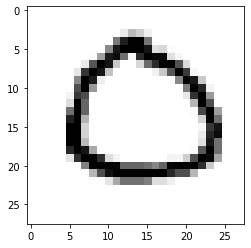

In [2]:
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = x.reshape([60000, 28*28])
zeros = np.where(y==0)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(265) # put your seed here
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x[my_image,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

For $k = 0, 10, 20, ...,100$, use $k$ principal components for MNIST $0$'s to approximately reconstruct the image selected above. Display the reconstruction for each value of $k$. To display the set of images compactly, you may want to use subplot, as shown in the starter code for Problem 3(c) below. You may also refer to the examples in this document: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.subplots.html

In [ ]:
# Your Code Here

Your Markdown Here

### 3.2

Repeat Part 1, but this time for the dresses in the Fashion-MNIST dataset.

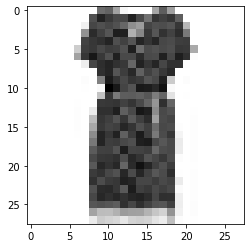

In [4]:
(x, y), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x = x.reshape([60000, 28*28])
zeros = np.where(y==3)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(265) #put your seed here
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x[my_image,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

In [ ]:
#Your Code Here

Your Markdown Here

### 3.3

Do the same thing as in Parts 1 and 2, this time reconstructing an image of Gerhard Schroeder.

In [ ]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

lfw_people.target_names

In [ ]:
x = lfw_people.data
y = lfw_people.target
zeros = np.where(y==4)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(265) #put your seed here
my_image = np.random.randint(0, len(y), size=1)


plt.imshow(x[my_image,:].reshape((50,37)), cmap=plt.cm.gray)#, cmap=plt.cm.gray.reversed())

In [ ]:
# Your Code Here

[Your Markdown Here]